# King County housing prices

Some more practise with data preparation and regression model tuning.


## Goal: 
Predict prices by performing regression on the other attributes.

## Setting up the data

In [177]:
import os
import pandas as pd

DATA_ROOT = "../datasets/"
HOUSING_PATH = DATA_ROOT + "housing/"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "kc_house_data.csv")
    return pd.read_csv(csv_path)

data = load_housing_data()
data.head(10) # lets take a peak

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Some simple observations

In [178]:
data.info() # Some stats about the 21 attributes (19 excluding id and price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**Looks like all the columns are whole and there is no missing data, so we probably won't need an Imputer**

*Also notice how all the attributes are numerical except the date*

Let's look at a summary of the numerical attributes.

In [179]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**The id, view, and zipcode attributes look pretty useless for what we are trying to do, so lets drop them**

In [180]:
housing = data.drop(["id", "view", "zipcode"], axis=1)

housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


**Maybe some visualization too**

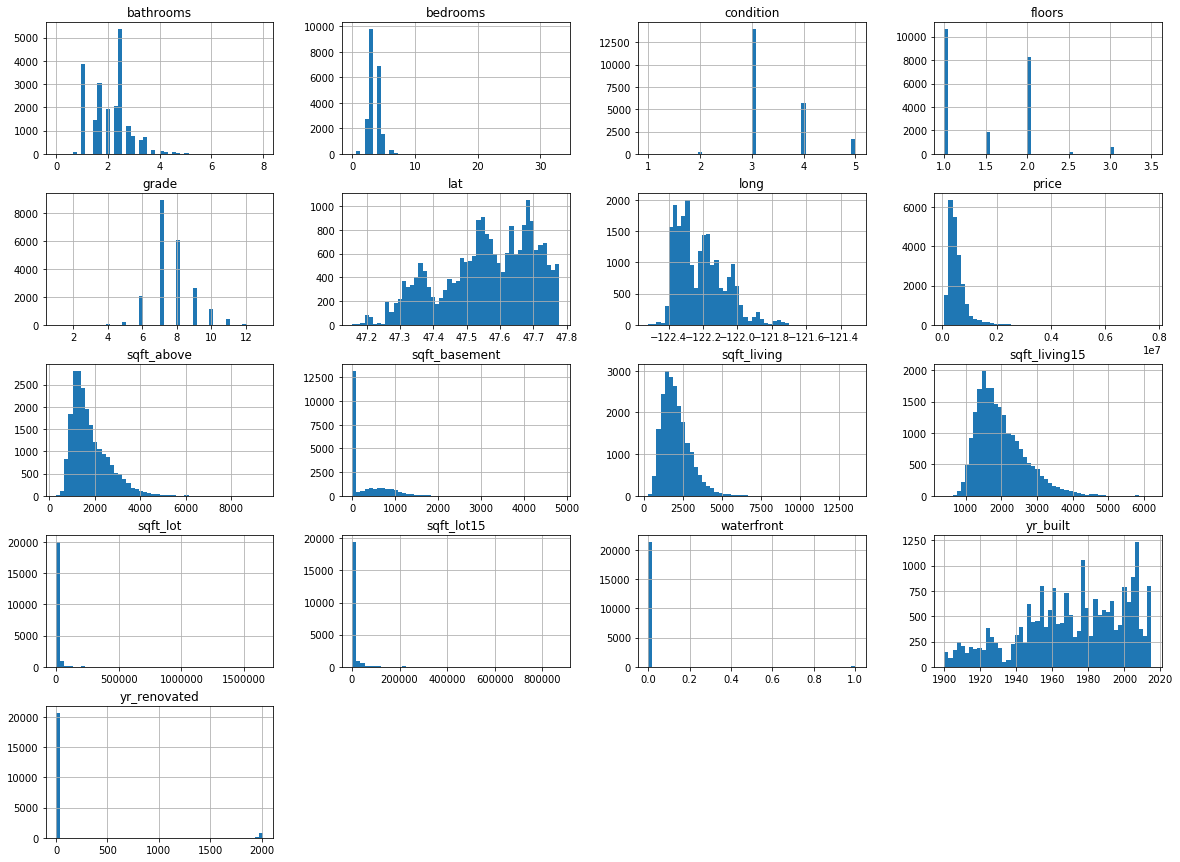

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

**Can see that some of the attributes have a lot of clustering at 0, probably the bin width's fault**

Especially the yr (year) values, those need to be scaled towards age maybe? Instead of "2015" do "4 years ago"

**Let's take a look at some of the ones with the most clustering at 0**


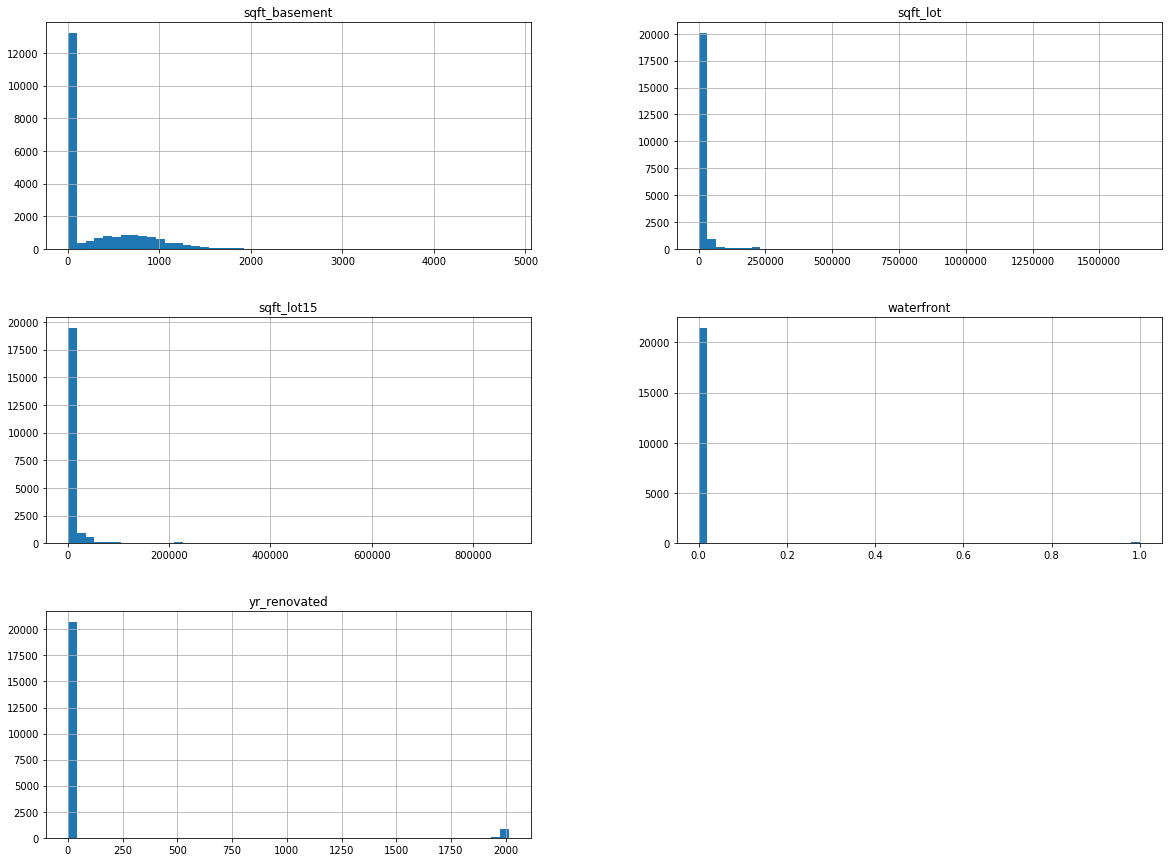

In [146]:
housing[["sqft_basement", "sqft_lot", "sqft_lot15", "waterfront", "yr_renovated"]].hist(bins=50, figsize=(20, 15))
plt.show()

Might just drop *sqft_lot15* and *sqft_living15* and instead handle whether or renovations happened via *yr_renovate*.

Also will probably transform some of these into binary attributes (which *waterfront* already is)

In [147]:
housing["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [148]:
housing = housing.drop(["sqft_lot15", "sqft_living15"], axis=1)
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


**Can take a look at the frequency of house sales depending on the time of the year:**

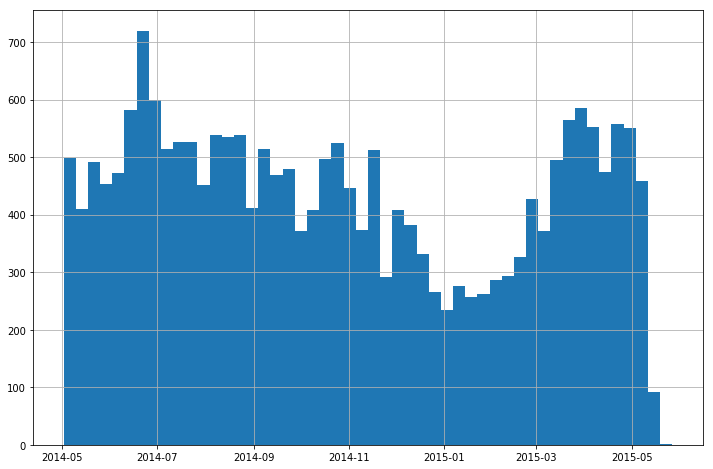

In [149]:
from datetime import datetime
converted_dates = housing["date"].apply(lambda x: datetime.strptime(x[:8], '%Y%m%d'))

converted_dates.hist(bins=50,figsize=(12, 8))

Can see that people like to buy houses in the summer and this enthusiasm dies down during the winter.

We previously saw that people like to buy houses in the summer and less so in the winter time. This trend looks pretty interesting and could contribute to the pricing. But the date is in a non-numerical format and we have to somehow convert it into a more friendly way for regression models.

In [150]:
housing["date"] = converted_dates.apply(lambda dt: datetime.timestamp(dt))

## Separating our test and training sets

Let's take a look at the linear correlation first before we decide what kind of sampling technique to use.

In [151]:
corr_matrix = housing.corr()
corr_matrix["price"]

date            -0.004361
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
Name: price, dtype: float64

**Notice how the price has some strong linear correlation between sqft_living, grade, and sqft_above**

This makes sense because bigger houses (*sqft_living is total, sqft_above* is excluding basement) usually cost more. And the *grade* is a very general measure of the house, so it already takes into consideration all the many factors.

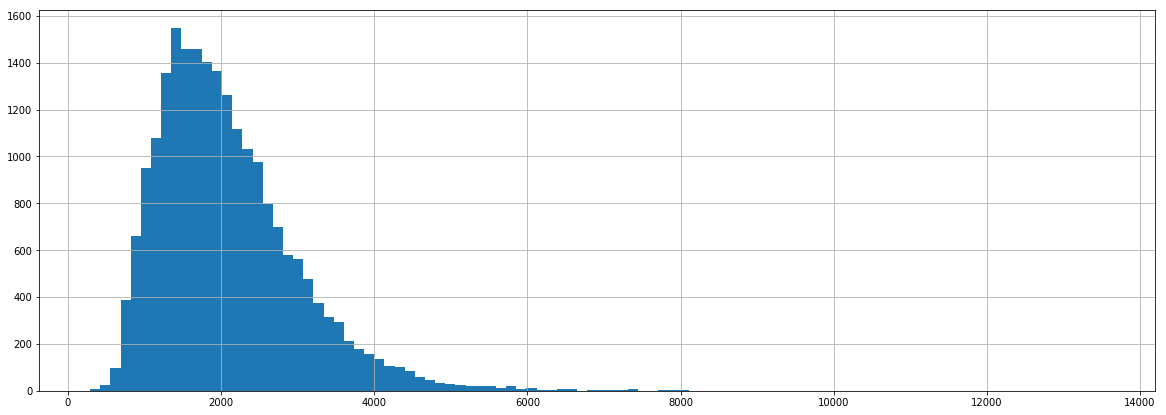

In [152]:
housing["sqft_living"].hist(bins=100, figsize=(20, 7)) # let's take a closer look at sqft_living

**Looks very** *tail heavy* **so we gotta make it more bell shaped**

Can see that most fall between 1000 to 4000. We could try categorizing them by size, and then using stratified sampling.

In [153]:
import numpy as np

housing["sqft_cat"] = np.ceil(housing["sqft_living"] / 1000)
housing["sqft_cat"].where(housing["sqft_cat"] < 4, 4.0, inplace=True)
housing["sqft_cat"].value_counts() / len(housing)

2.0    0.472771
3.0    0.315505
4.0    0.142599
1.0    0.069125
Name: sqft_cat, dtype: float64

In [154]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["sqft_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

**Also try simple random sampling**

In [155]:
from sklearn.model_selection import train_test_split

simple_train_set, simple_test_set = train_test_split(housing, test_size=0.2, random_state=42)

**Comparison of the two sampling techniques**

In [156]:
def income_cat_proportions(data):
    return data["sqft_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(simple_test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [157]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.069125,0.069165,0.065232,-5.631223,0.057675
2.0,0.472771,0.472820,0.470044,-0.576826,0.010319
3.0,0.315505,0.315522,0.318297,0.885224,0.005411
4.0,0.142599,0.142494,0.146426,2.683554,-0.074140


The simple random sampling resulted in more skewed data in comparison to the stratfied sampling. Of course this does not necessarily mean stratified sampling is good, since the sqft categories we made were a bit arbitrary.

In [158]:
for set in (strat_train_set, strat_test_set): # Let's revert our data back to normal
    set.drop(["sqft_cat"], axis=1, inplace=True)

## Visualize the training data

In [159]:
housing = strat_train_set.copy()

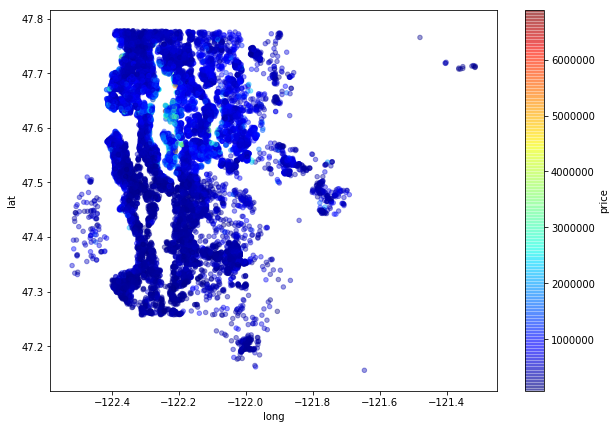

In [160]:
housing.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204D4B025C0>,
      dtype=object)

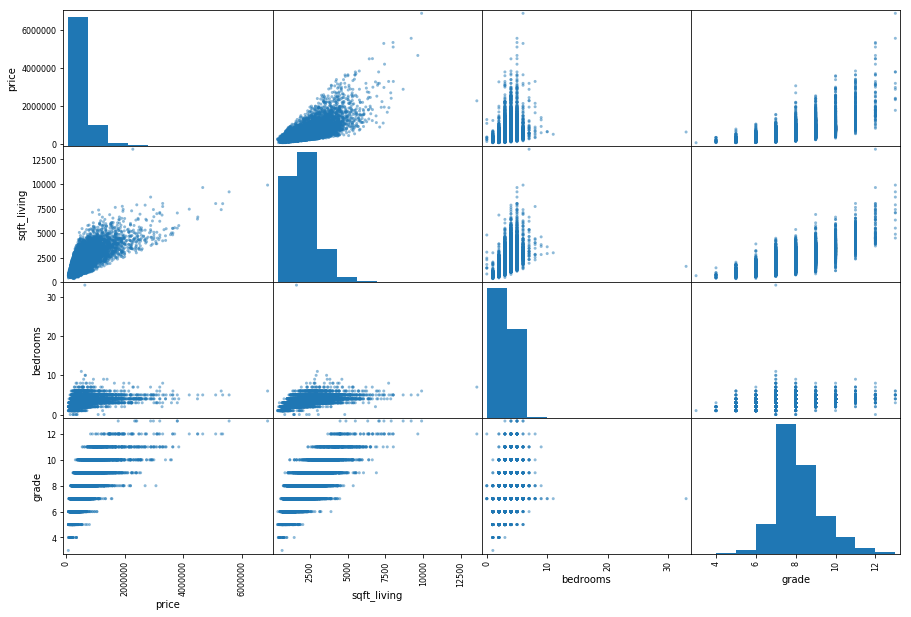

In [161]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "bedrooms", "grade"]
scatter_matrix(housing[attributes], figsize=(15, 10))


**As expected from before,** *price* **and** *sqft_living* **have a noticeable positive correlation.**

## Cleaning the data

**Seperate the label**

In [162]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

**First, some binary attributes**

In [163]:
from sklearn.preprocessing import Binarizer

housing_bin = housing[["yr_renovated", "waterfront", "sqft_lot"]]


binarizer = Binarizer(threshold=0.0)
binarizer.fit(housing_bin)

X = binarizer.transform(housing_bin)
X

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

**I plan to do feature scaling differently for different features, ones without outliers like yr_built will be min-max, others with a more gaussian dist will be standarized.**

In [164]:
housing.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

In [165]:
norm_attribs = list(housing.drop(["date", "yr_built", "yr_renovated", "waterfront", "sqft_lot"], axis=1))
minmax_attribs = ["date", "yr_built"]

binary_attribs = list(housing_bin)

print(norm_attribs)
print(minmax_attribs)
print(binary_attribs)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long']
['date', 'yr_built']
['yr_renovated', 'waterfront', 'sqft_lot']


In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

norm_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])


In [167]:
from sklearn.preprocessing import MinMaxScaler

minmax_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler())
])

In [168]:
binary_pipeline = Pipeline([
    ('binarizer', Binarizer(threshold=0.0))
])

In [169]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('norm', norm_pipeline, norm_attribs),
    ('minmax', minmax_pipeline, minmax_attribs),
    ('binary', binary_pipeline, binary_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

C:\Users\Frost\Anaconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Frost\Anaconda3\envs\mlbook\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Frost\Anaconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [170]:
housing_prepared

array([[-1.46440343, -1.4485523 , -1.49079916, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66938515,  0.49712986,  1.22815768, ...,  0.        ,
         0.        ,  1.        ],
       [-0.39750914,  0.49712986,  0.43422228, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.39750914, -0.47571122, -0.2727065 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.46440343, -1.4485523 , -1.21890347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66938515,  0.49712986,  0.19495408, ...,  0.        ,
         0.        ,  1.        ]])

In [171]:
housing_prepared.shape

(17290, 15)

## Selecting and training a model

In [172]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) # Train (fit) the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
# let's manually try the model on a couple of training examples

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) # it's transform rather than fit_transform because pipeline already trained (fitted)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [236849.58509721 892502.12846098 648071.10987067 397290.86001877
 195933.16242552]
Labels: [362362.0, 750000.0, 775000.0, 325000.0, 237000.0]


C:\Users\Frost\Anaconda3\envs\mlbook\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


**Not great, not terrible.**

Time to check perfomance

In [175]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

204976.46611206874

Seems pretty bad considering RMSE is std dev and the average house price is 500k

In [183]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

129060.07694440255

In [184]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [185]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Now we are overfitting instead of underfitting. Let's do some cross validation to gain some insight

In [188]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [204996.0987963  197697.89912951 173262.9156774  194356.60985921
 196686.58941489 179590.39440745 197221.90416557 196829.6119207
 189972.23657214 178143.62063965]
Mean: 190875.7880582828
Standard deviation: 9838.826107203755


In [189]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [238869.44905464 189932.0734135  201959.39458228 197214.51214566
 209088.14615762 188683.00884704 213022.22036283 198239.53396136
 208710.09521698 206424.00399979]
Mean: 205214.24377416918
Standard deviation: 13610.259891644342


Seems like the desicion tree regressor is performing better than the single linear regression model.

**Let's try some ensemble learning**

In [190]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [191]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

60729.58146972038

In [192]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [161521.97661158 132728.65269178 133318.77534093 127643.76313523
 140546.42961614 124593.67735161 154639.03409682 134149.0000221
 145414.70520036 138848.06455483]
Mean: 139340.40786213992
Standard deviation: 11071.890416924482


Looks a lot better. Notice how the cross validation score is a lot worse than on the whole training set, this means that the random tree model is still overfitting the training set.

**Further tweak the model**

In [193]:

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [194]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [195]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [196]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

194144.75849085866 {'max_features': 2, 'n_estimators': 3}
164253.64132595822 {'max_features': 2, 'n_estimators': 10}
153790.38038406047 {'max_features': 2, 'n_estimators': 30}
170458.7265591107 {'max_features': 4, 'n_estimators': 3}
148786.53915840437 {'max_features': 4, 'n_estimators': 10}
144087.7736944657 {'max_features': 4, 'n_estimators': 30}
169421.81516868676 {'max_features': 6, 'n_estimators': 3}
146133.25842602592 {'max_features': 6, 'n_estimators': 10}
140194.33454749128 {'max_features': 6, 'n_estimators': 30}
167279.6869821749 {'max_features': 8, 'n_estimators': 3}
145908.36594873 {'max_features': 8, 'n_estimators': 10}
140014.2375563546 {'max_features': 8, 'n_estimators': 30}
183821.2284633461 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
156186.4232915419 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
177364.6605544986 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
152193.2839270428 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [197]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043092,0.001476,0.002794,0.000398,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.670319e+10,-3.798668e+10,...,-3.769219e+10,1.442315e+09,18,-9.043622e+09,-1.039157e+10,-1.112563e+10,-1.056067e+10,-9.917779e+09,-1.020785e+10,6.985885e+08
1,0.133843,0.000749,0.007381,0.000488,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.794294e+10,-2.585065e+10,...,-2.697926e+10,2.363725e+09,11,-5.383250e+09,-5.545397e+09,-5.341755e+09,-4.937135e+09,-4.957147e+09,-5.232937e+09,2.431563e+08
2,0.397730,0.003308,0.021949,0.000014,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.582707e+10,-2.117235e+10,...,-2.365148e+10,2.292382e+09,9,-3.647395e+09,-3.750339e+09,-3.871735e+09,-3.377603e+09,-3.537595e+09,-3.636933e+09,1.704244e+08
3,0.062641,0.000750,0.002588,0.000487,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.191732e+10,-2.630056e+10,...,-2.905618e+10,2.692444e+09,14,-7.977245e+09,-9.429745e+09,-9.023163e+09,-7.573649e+09,-7.842752e+09,-8.369311e+09,7.233396e+08
4,0.210227,0.015637,0.008577,0.001199,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.369582e+10,-2.037221e+10,...,-2.213743e+10,1.891522e+09,7,-4.383159e+09,-4.800861e+09,-4.851527e+09,-4.336137e+09,-4.080842e+09,-4.490505e+09,2.932010e+08
5,0.608983,0.010213,0.021741,0.000397,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.351766e+10,-1.853997e+10,...,-2.076129e+10,2.328566e+09,3,-3.127626e+09,-3.223432e+09,-3.351165e+09,-3.266695e+09,-2.985610e+09,-3.190905e+09,1.254079e+08
6,0.086567,0.001327,0.002594,0.000486,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.369284e+10,-2.590177e+10,...,-2.870375e+10,3.347686e+09,13,-6.913189e+09,-8.011553e+09,-7.663084e+09,-8.691996e+09,-7.725238e+09,-7.801012e+09,5.746611e+08
7,0.283644,0.014416,0.007774,0.000397,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.288877e+10,-2.052794e+10,...,-2.135493e+10,1.627069e+09,5,-3.973863e+09,-4.257983e+09,-4.726016e+09,-4.375484e+09,-4.001574e+09,-4.266984e+09,2.752913e+08
8,0.824601,0.006682,0.021741,0.000398,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.213086e+10,-1.797549e+10,...,-1.965445e+10,1.995324e+09,2,-2.875989e+09,-3.103649e+09,-3.232575e+09,-2.989710e+09,-2.960668e+09,-3.032518e+09,1.237567e+08
9,0.106316,0.001620,0.002593,0.000487,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.636945e+10,-2.642745e+10,...,-2.798249e+10,4.622557e+09,12,-6.880241e+09,-7.689121e+09,-7.587937e+09,-6.341939e+09,-6.530600e+09,-7.005968e+09,5.455460e+08


Let's look into feature importances for more insight

In [198]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0076752 , 0.03493593, 0.2990887 , 0.0049874 , 0.00547703,
       0.20410637, 0.09164067, 0.0149451 , 0.15722232, 0.08239487,
       0.01934902, 0.04123543, 0.00198629, 0.03495567, 0.        ])

In [199]:

attributes = norm_attribs + minmax_attribs + binary_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.29908869875081867, 'sqft_living'),
 (0.20410637478548654, 'grade'),
 (0.15722232087453109, 'lat'),
 (0.09164066582716389, 'sqft_above'),
 (0.08239487449070491, 'long'),
 (0.04123542740969763, 'yr_built'),
 (0.0349556666276442, 'waterfront'),
 (0.034935926782427185, 'bathrooms'),
 (0.019349023638755007, 'date'),
 (0.014945098352193542, 'sqft_basement'),
 (0.007675201601357572, 'bedrooms'),
 (0.005477027236575154, 'condition'),
 (0.004987404078842509, 'floors'),
 (0.0019862895438019605, 'yr_renovated'),
 (0.0, 'sqft_lot')]

Can probably weed out the unimportant features and add a transformer into the pipeline to do so.

In [201]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

C:\Users\Frost\Anaconda3\envs\mlbook\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


139701.05298667177

## Observations

It appears that as we predicted, the size of the home (sqft_living) is the most important feature when predicting the price of a house. 